group 39

miaomiao yang & Sheng Cheng

https://colab.research.google.com/drive/13RmoeolPFc0Xu1g2ZXHys3_CPMmVuTrO#scrollTo=jqcGSSiAKljX

### **Load in Dataset**


In [150]:
# load in dataset & packages
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


## **EDA**

### Data Cleaning

In [151]:
value_counts = df['Perceived_Race'].value_counts()
percentage = df['Perceived_Race'].value_counts(normalize=True) * 100
print(value_counts)
print(percentage)

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64
White                   42.473036
Black                   26.850717
Unknown or Legacy        7.746047
East/Southeast Asian     6.764003
South Asian              5.535298
Middle-Eastern           4.959247
Indigenous               2.962986
Latino                   2.708665
Name: Perceived_Race, dtype: float64


In [152]:
value_counts = df['Sex'].value_counts()
percentage = df['Sex'].value_counts(normalize=True) * 100
print(value_counts)
print(percentage)

M    52650
F    12617
U        9
Name: Sex, dtype: int64
M    80.657516
F    19.328697
U     0.013788
Name: Sex, dtype: float64


In [153]:
value_counts = df['Age_group__at_arrest_'].value_counts()
percentage = df['Age_group__at_arrest_'].value_counts(normalize=True) * 100
print(value_counts)
print(percentage)

Aged 25 to 34 years          20949
Aged 35 to 44 years          16242
Aged 18 to 24 years          10041
Aged 45 to 54 years           9066
Aged 55 to 64 years           4590
Aged 17 years and younger     1681
Aged 17 years and under       1361
Aged 65 years and older        698
Aged 65 and older              624
Name: Age_group__at_arrest_, dtype: int64
Aged 25 to 34 years          32.104763
Aged 35 to 44 years          24.891191
Aged 18 to 24 years          15.388034
Aged 45 to 54 years          13.893827
Aged 55 to 64 years           7.034267
Aged 17 years and younger     2.576166
Aged 17 years and under       2.085760
Aged 65 years and older       1.069699
Aged 65 and older             0.956293
Name: Age_group__at_arrest_, dtype: float64


In [154]:
value_counts = df['Occurrence_Category'].value_counts()
percentage = df['Occurrence_Category'].value_counts(normalize=True) * 100
print(value_counts)
print(percentage)

Assault                                            7726
Assault & Other crimes against persons             7235
Robbery & Theft                                    4580
Warrant                                            4385
FTA/FTC/Compliance Check/Parollee                  4246
Police Category - Administrative                   3888
FTA/FTC, Compliance Check & Parollee               3877
Robbery/Theft                                      3754
Drug Related                                       2751
Other Statute & Other Incident Type                2344
Vehicle Related (inc. Impaired)                    1977
Other Offence                                      1972
Mischief & Fraud                                   1732
Impaired                                           1362
Harassment/Threatening                             1346
Mischief                                           1322
Harassment & Threatening                           1268
Weapons                                         

In [155]:
# notice in column 'Age_group__at_arrest_', there are two similar values 'Aged 17 years and under' and 'Aged 17 years and younger'
# check if there are repeated obsearvations based on the EventID and ArrestID
# select the column 'Aged 17 years and under', 'Aged 17 years and younger'
df_age17 = df.loc[df['Age_group__at_arrest_'].isin(['Aged 17 years and under', 'Aged 17 years and younger'])]
# select the rows that are duplicated based on the EventID
duplicateEvent = df_age17[df_age17['EventID'].duplicated() == True]
duplicateEvent.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
23445,2020,Oct-Dec,1009591,6048792.0,300628,Black,M,Aged 17 years and younger,Youth (aged 17 and younger),41,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,23446
27156,2021,Jan-Mar,1029494,6038148.0,334263,Black,M,Aged 17 years and under,Youth (aged 17 years and under),22,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,27157
27539,2020,Apr-June,1055696,6010135.0,317092,Black,M,Aged 17 years and younger,Youth (aged 17 and younger),31,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,27540
27873,2021,July-Sept,1007964,6037544.0,330302,Black,M,Aged 17 years and under,Youth (aged 17 years and under),43,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,27874
30116,2020,Jan-Mar,1036338,6021832.0,300866,Black,M,Aged 17 years and younger,Youth (aged 17 and younger),33,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,30117


In [156]:
# from the duplicated eventID observations select duplicated based on ArrestID
duplicateArrest = duplicateEvent[duplicateEvent['ArrestID'].duplicated() == True]
duplicateArrest

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
47233,2020,Apr-June,1059318,NaN,326679,South Asian,M,Aged 17 years and younger,Youth (aged 17 and younger),XX,...,0,0,0,0,1.0,0.0,0.0,0.0,0.0,47234
50495,2020,Jan-Mar,1019010,NaN,308690,Black,M,Aged 17 years and younger,Youth (aged 17 and younger),XX,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,50496


In [157]:
# any occurrence of the string 'Aged 17 years and under' in the 'Age_group__at_arrest_' column will be replaced with 'Aged 17 years and younger'.
df['Age_group__at_arrest_'].replace('Aged 17 years and under', 'Aged 17 years and younger', inplace = True)
df['Age_group__at_arrest_'].replace('Aged 65 and older','Aged 65 years and older', inplace = True)
df['Occurrence_Category'].replace('Break and Enter', 'Break & Enter', inplace = True)
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [158]:
# Select the target variables 
df1 = df[['Age_group__at_arrest_', 'Occurrence_Category', 'StripSearch', 'Perceived_Race', 'Sex']]
df1.head()

,Age_group__at_arrest_,Occurrence_Category,StripSearch,Perceived_Race,Sex
0,Aged 35 to 44 years,Assault & Other crimes against persons,0,White,M
1,Aged 35 to 44 years,Assault & Other crimes against persons,0,White,M
2,Aged 35 to 44 years,Assault & Other crimes against persons,0,Unknown or Legacy,M
3,Aged 25 to 34 years,Harassment/Threatening,0,Black,M
4,Aged 25 to 34 years,FTA/FTC/Compliance Check/Parollee,0,South Asian,M


In [159]:
# Create a new column with 1 for each strip search and 0 for no strip search, check 'NaN'
df1['StripBinary'] = df1['StripSearch'].apply(lambda x: 1 if x == 1 else 0)
df1.head()


<ipython-input-159-c7a10e0c9b91>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age_group__at_arrest_,Occurrence_Category,StripSearch,Perceived_Race,Sex,StripBinary
0,Aged 35 to 44 years,Assault & Other crimes against persons,0,White,M,0
1,Aged 35 to 44 years,Assault & Other crimes against persons,0,White,M,0
2,Aged 35 to 44 years,Assault & Other crimes against persons,0,Unknown or Legacy,M,0
3,Aged 25 to 34 years,Harassment/Threatening,0,Black,M,0
4,Aged 25 to 34 years,FTA/FTC/Compliance Check/Parollee,0,South Asian,M,0


In [160]:
# Group the data by Age_group__at_arrest_, Perceived_Race group and occurrence category and sum the StripSearchBinary column.
grouped = df1.groupby(['Occurrence_Category', 'Perceived_Race', 'Age_group__at_arrest_', 'Sex'])['StripBinary'].sum()
grouped

Occurrence_Category  Perceived_Race  Age_group__at_arrest_      Sex
Assault              Black           Aged 17 years and younger  F       0
                                                                M       0
                                     Aged 18 to 24 years        F       1
                                                                M       3
                                     Aged 25 to 34 years        F       1
                                                                       ..
Weapons & Homicide   White           Aged 45 to 54 years        M      13
                                     Aged 55 to 64 years        F       1
                                                                M       4
                                     Aged 65 years and older    F       1
                                                                M       0
Name: StripBinary, Length: 2488, dtype: int64

In [161]:
# Reset the index to create a DataFrame from the grouped data
strip_search_freq = grouped.reset_index()
strip_search_freq.head()

,Occurrence_Category,Perceived_Race,Age_group__at_arrest_,Sex,StripBinary
0,Assault,Black,Aged 17 years and younger,F,0
1,Assault,Black,Aged 17 years and younger,M,0
2,Assault,Black,Aged 18 to 24 years,F,1
3,Assault,Black,Aged 18 to 24 years,M,3
4,Assault,Black,Aged 25 to 34 years,F,1


In [162]:
# Rename the sum column to StripSearchFreq
strip_search_freq = strip_search_freq.rename(columns={'StripBinary': 'StripSearchFreq'})
strip_search_freq.head()

,Occurrence_Category,Perceived_Race,Age_group__at_arrest_,Sex,StripSearchFreq
0,Assault,Black,Aged 17 years and younger,F,0
1,Assault,Black,Aged 17 years and younger,M,0
2,Assault,Black,Aged 18 to 24 years,F,1
3,Assault,Black,Aged 18 to 24 years,M,3
4,Assault,Black,Aged 25 to 34 years,F,1


### Descriptive Statistics

In [163]:
strip_search_freq.describe()

,StripSearchFreq
count,2488.000000
mean,3.134646
std,12.486678
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,177.000000


In [164]:
value_counts = strip_search_freq['Perceived_Race'].value_counts()
percentage = strip_search_freq['Perceived_Race'].value_counts(normalize=True) * 100
print(value_counts)
print(percentage)

White                   402
Black                   365
Unknown or Legacy       330
East/Southeast Asian    328
South Asian             294
Middle-Eastern          275
Latino                  259
Indigenous              235
Name: Perceived_Race, dtype: int64
White                   16.157556
Black                   14.670418
Unknown or Legacy       13.263666
East/Southeast Asian    13.183280
South Asian             11.816720
Middle-Eastern          11.053055
Latino                  10.409968
Indigenous               9.445338
Name: Perceived_Race, dtype: float64


In [165]:
value_counts = strip_search_freq['Sex'].value_counts()
percentage = strip_search_freq['Sex'].value_counts(normalize=True) * 100
print(value_counts)
print(percentage)

M    1450
F    1030
U       8
Name: Sex, dtype: int64
M    58.279743
F    41.398714
U     0.321543
Name: Sex, dtype: float64


In [166]:
value_counts = strip_search_freq['Age_group__at_arrest_'].value_counts()
percentage = strip_search_freq['Age_group__at_arrest_'].value_counts(normalize=True) * 100
print(value_counts)
print(percentage)

Aged 25 to 34 years          440
Aged 18 to 24 years          426
Aged 35 to 44 years          416
Aged 45 to 54 years          377
Aged 55 to 64 years          333
Aged 17 years and younger    280
Aged 65 years and older      216
Name: Age_group__at_arrest_, dtype: int64
Aged 25 to 34 years          17.684887
Aged 18 to 24 years          17.122186
Aged 35 to 44 years          16.720257
Aged 45 to 54 years          15.152733
Aged 55 to 64 years          13.384244
Aged 17 years and younger    11.254019
Aged 65 years and older       8.681672
Name: Age_group__at_arrest_, dtype: float64


In [167]:
value_counts = strip_search_freq['Occurrence_Category'].value_counts()
percentage = strip_search_freq['Occurrence_Category'].value_counts(normalize=True) * 100
print(value_counts)
print(percentage)

Robbery & Theft                                    110
Assault                                            109
Robbery/Theft                                      109
Assault & Other crimes against persons             106
Warrant                                            104
FTA/FTC, Compliance Check & Parollee               101
FTA/FTC/Compliance Check/Parollee                   98
Police Category - Administrative                    94
Other Statute & Other Incident Type                 93
Mischief & Fraud                                    92
Harassment/Threatening                              91
Other Offence                                       91
Mischief                                            90
Drug Related                                        90
Vehicle Related (inc. Impaired)                     87
Harassment & Threatening                            86
Other Statute                                       83
Impaired                                            80
Vehicle Re

In [168]:
from datascience import Table
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
import seaborn as sns
import plotly.express as px

In [169]:
fig_1 = px.bar(strip_search_freq, x="Perceived_Race", y="StripSearchFreq", color = "Occurrence_Category",
             title="The Strip Search by Race and Occurrence Category", 
             labels = {'Perceived_Race':'Race', 'StripSearchFreq': 'Strip Search','Occurrence_Category':'Occurrence Category'})
fig_1.show()

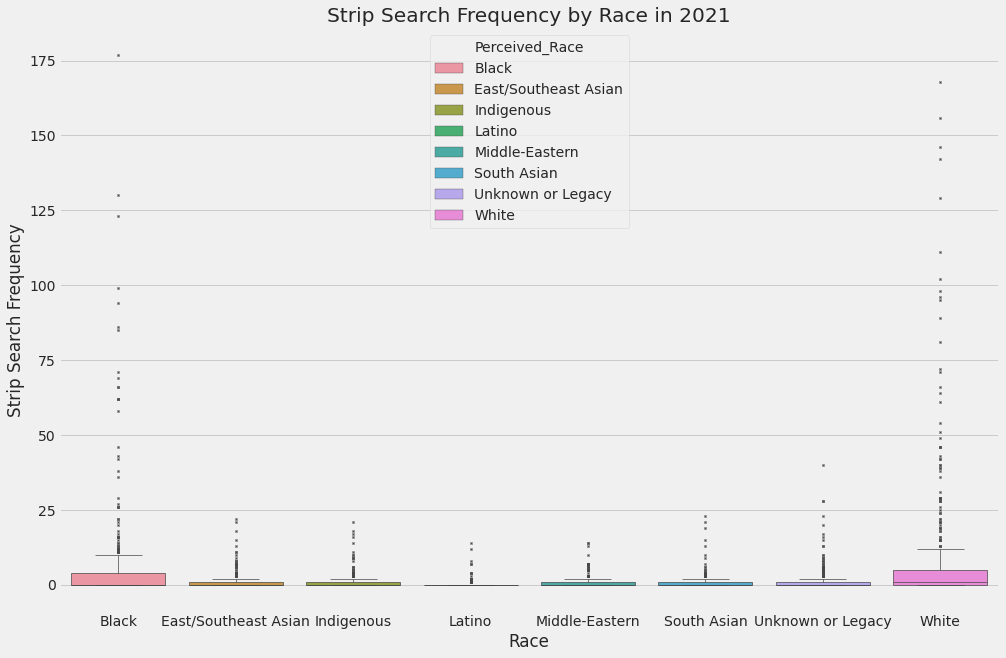

In [170]:
fig_2 = plt.figure(figsize = (15,10))
fig_2 = sns.boxplot(data = strip_search_freq, x="Perceived_Race", y="StripSearchFreq", hue = "Perceived_Race",
                    dodge = False, fliersize = 2, linewidth =0.7,
                    flierprops ={'marker':'x'}).set(title = 'Strip Search Frequency by Race in 2021',
                                                    xlabel = 'Race',ylabel = 'Strip Search Frequency')
fig_2 = sns.set_style('white')
fig_2 = sns.set_palette('flare')
fig_2 = plt.show()

### Two-sample t-test

Ho: There is no mean difference of the strip search frequency between the people who was arrested by Assault & Other crines against persons and FTA/FTC/Compliance Check/Parollee. 

Ha: There is mean difference of the strip search frequency between the people who was arrested by Assault & Other crines against persons and FTA/FTC/Compliance Check/Parollee. 

In [171]:
from scipy.stats import ttest_ind

# Subset the data for Assault and Robbery & Theft individuals
assault = strip_search_freq[strip_search_freq['Occurrence_Category'] == 'Assault & Other crimes against persons']
robbery = strip_search_freq[strip_search_freq['Occurrence_Category'] == 'FTA/FTC/Compliance Check/Parollee']

# Perform the t-test
t_stat, p_val = ttest_ind(assault['StripSearchFreq'], robbery['StripSearchFreq'])

print("T-statistic: ", t_stat)
print("p-value: ", p_val)

T-statistic:  4.20360123043
p-value:  3.94406434114e-05


Ho: There is no mean difference of the strip search frequency between the people who is White and those who is not white.

Ha: There is mean difference of the strip search frequency between the people who is white and those who is not White.

In [172]:
from scipy.stats import ttest_ind

# Subset the data for white and non-white individuals
white = strip_search_freq[strip_search_freq['Perceived_Race'] == 'White']
non_white = strip_search_freq[strip_search_freq['Perceived_Race'] != 'White']

# Perform the t-test
t_stat, p_val = ttest_ind(white['StripSearchFreq'], non_white['StripSearchFreq'])

print("T-statistic: ", t_stat)
print("p-value: ", p_val)

T-statistic:  10.2677404968
p-value:  2.98173369586e-24


H0: There is no mean difference of the strip search frequency between age groups under 35 and older 35.

H1: There is a mean difference of the strip search frequency between age groups under 35 and older 35.

In [173]:
from scipy.stats import ttest_ind

# Subset the data for white and non-white individuals
age25 = strip_search_freq[strip_search_freq['Age_group__at_arrest_'].isin(['Aged 25 to 34 years', 'Aged 18 to 24 years'])]
age35 = strip_search_freq[strip_search_freq['Age_group__at_arrest_'].isin(['Aged 35 to 44 years', 'Aged 45 to 54 years', 'Aged 55 to 64 years'])]

# Perform the t-test
t_stat, p_val = ttest_ind(age25['StripSearchFreq'], age35['StripSearchFreq'])

print("T-statistic: ", t_stat)
print("p-value: ", p_val)

T-statistic:  2.83631882561
p-value:  0.004609856353


H0: There is no mean difference of the strip search frequency between Male and Female.

H1: There is a mean difference of the strip search frequency between Male and Female.

In [174]:
from scipy.stats import ttest_ind

# Subset the data for white and non-white individuals
male = strip_search_freq[strip_search_freq['Sex'] == 'M']
female = strip_search_freq[strip_search_freq['Sex'] == 'F']

# Perform the t-test
t_stat, p_val = ttest_ind(male['StripSearchFreq'], female['StripSearchFreq'])

print("T-statistic: ", t_stat)
print("p-value: ", p_val)

T-statistic:  6.42558605834
p-value:  1.5699842451e-10


##**ANOVA & Tukey's HSD Test**

### Research Question1: How does the Occurrence_category and Perceived_Race affect the frequency of Strip Search? 

In [175]:
# select the rows with the occurrence category as 'Assault & Other crimes against persons', 'FTA/FTC/Compliance Check/Parollee'
selected_freq =strip_search_freq[strip_search_freq['Occurrence_Category'].isin(['Assault & Other crimes against persons', 'FTA/FTC/Compliance Check/Parollee'])]
selected_freq = selected_freq.reset_index()
selected_freq.head()

,index,Occurrence_Category,Perceived_Race,Age_group__at_arrest_,Sex,StripSearchFreq
0,109,Assault & Other crimes against persons,Black,Aged 17 years and younger,F,0
1,110,Assault & Other crimes against persons,Black,Aged 17 years and younger,M,7
2,111,Assault & Other crimes against persons,Black,Aged 18 to 24 years,F,17
3,112,Assault & Other crimes against persons,Black,Aged 18 to 24 years,M,71
4,113,Assault & Other crimes against persons,Black,Aged 25 to 34 years,F,16


In [176]:
# Anova test 

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the two-way ANOVA model
model = ols('StripSearchFreq ~ C(Perceived_Race) + C(Occurrence_Category) + C(Perceived_Race):C(Occurrence_Category)',
            selected_freq).fit()

# Get the ANOVA table
table = sm.stats.anova_lm(model, typ=2)

print(table)

                                                sum_sq     df          F  \
C(Perceived_Race)                         12884.884134    7.0   4.996942   
C(Occurrence_Category)                     8596.708586    1.0  23.337486   
C(Perceived_Race):C(Occurrence_Category)   9458.227929    7.0   3.668036   
Residual                                  69252.583933  188.0        NaN   

                                            PR(>F)  
C(Perceived_Race)                         0.000033  
C(Occurrence_Category)                    0.000003  
C(Perceived_Race):C(Occurrence_Category)  0.000975  
Residual                                       NaN  


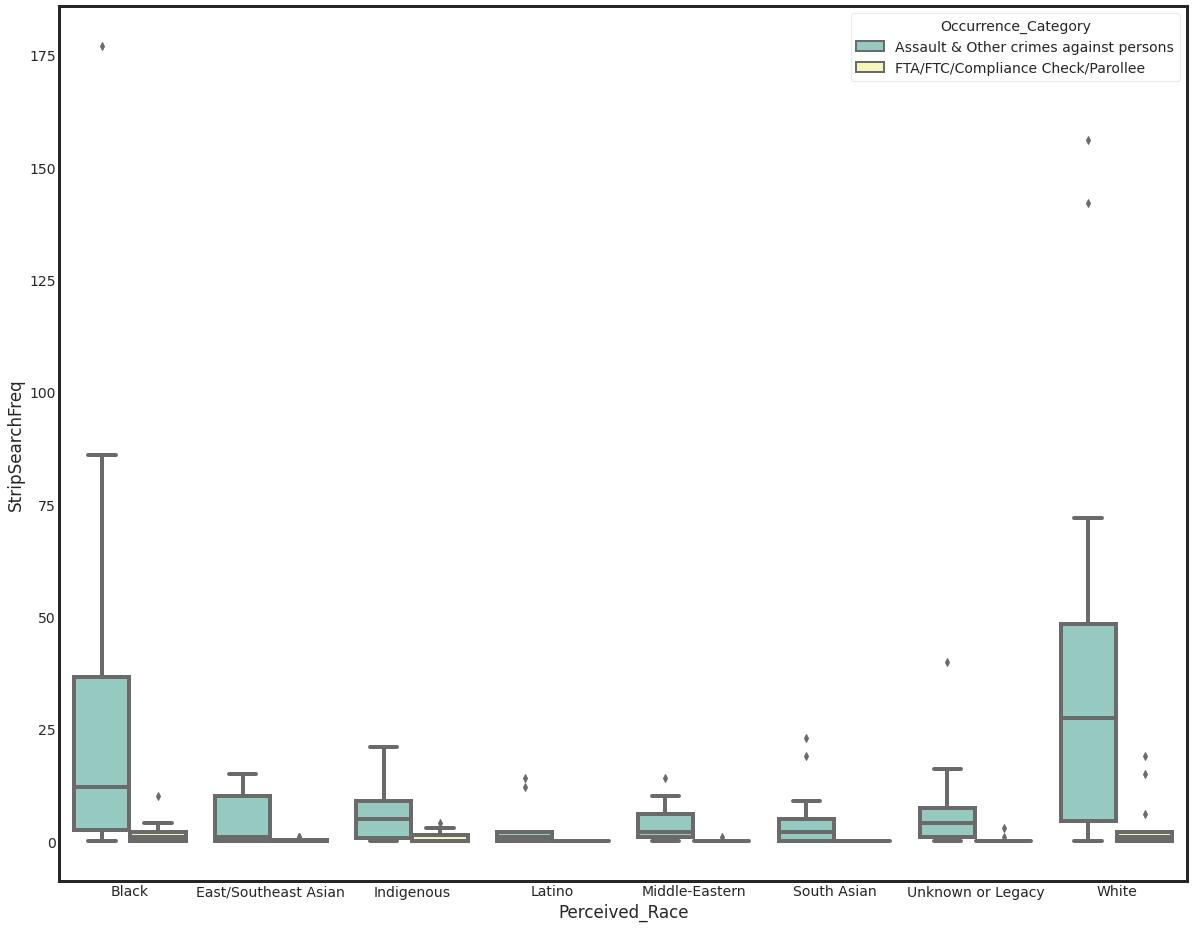

In [177]:
# generate a boxplot to see the data distribution. Using boxplot, we can easily detect the 
# differences between different groups
plt.figure(figsize= (18,15))
sns.boxplot(x="Perceived_Race", y="StripSearchFreq", hue="Occurrence_Category", data=selected_freq, palette="Set3") 
plt.show()

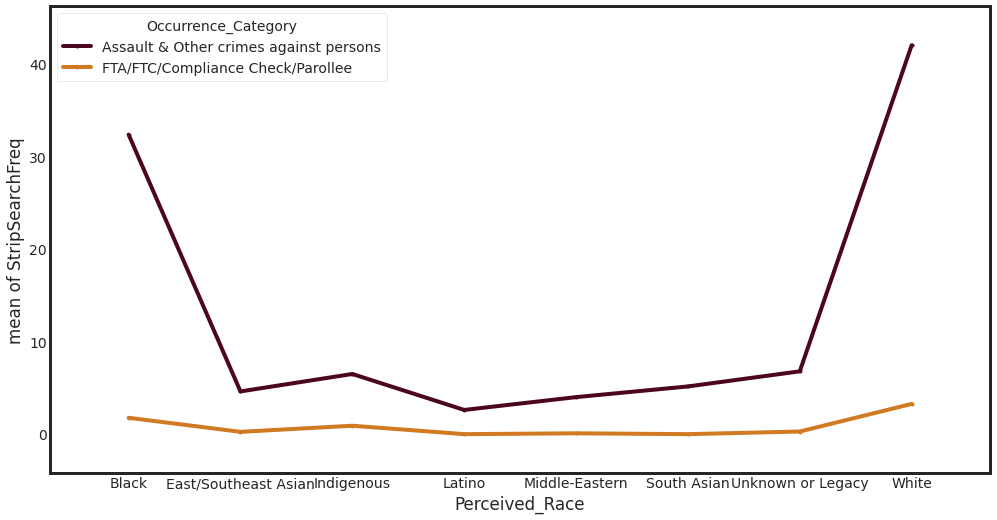

In [178]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=selected_freq['Perceived_Race'], trace=selected_freq['Occurrence_Category'], response=selected_freq['StripSearchFreq'], 
    colors=['#4c061d','#d17a22'])
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

Ho: There is no difference between the means of any two groups.
Ha: At least one pair of group means is significantly different.

In [179]:

# Perform the Tukey HSD test for multiple comparisons
selected_freq['Race_Occurrence'] = selected_freq['Perceived_Race'] + '_' + selected_freq['Occurrence_Category']
tukey_results = sm.stats.multicomp.MultiComparison(selected_freq['StripSearchFreq'], selected_freq['Race_Occurrence'])
tukey_res = tukey_results.tukeyhsd()

# Display the results
print(tukey_res.summary())


                                                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                       
                           group1                                                      group2                           meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------------------------------------------------------------------
               Black_Assault & Other crimes against persons                     Black_FTA/FTC/Compliance Check/Parollee -30.5879 0.0052  -56.264  -4.9118   True
               Black_Assault & Other crimes against persons East/Southeast Asian_Assault & Other crimes against persons -27.7418 0.0205 -53.4178  -2.0657   True
               Black_Assault & Other crimes against persons      East/Southeast Asian_FTA/FTC/Compliance Check/Parollee -32.1071 0.0034 -58.3321  -5.8822   True
               Black_Assault & Oth

### Research Question2: How does the Sex and Age group affect the frequency of Strip Search?

In [180]:
# Anova test 

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the two-way ANOVA model
model = ols('StripSearchFreq ~ C(Sex) + C(Age_group__at_arrest_) + C(Sex):C(Age_group__at_arrest_)',
            strip_search_freq).fit()

# Get the ANOVA table
table = sm.stats.anova_lm(model, typ=2)

print(table)

# Perform Durbin-Watson test on the residuals
dw_statistic = sm.stats.stattools.durbin_watson(model.resid)
# Print the test statistic
print("Durbin-Watson statistic:", dw_statistic)

                                        sum_sq      df          F  \
C(Sex)                                0.008894     2.0   0.000030   
C(Age_group__at_arrest_)          18436.396157     6.0  20.770821   
C(Sex):C(Age_group__at_arrest_)    4155.173265    12.0   2.340652   
Residual                         365399.611865  2470.0        NaN   

                                       PR(>F)  
C(Sex)                           9.956259e-01  
C(Age_group__at_arrest_)         7.417785e-17  
C(Sex):C(Age_group__at_arrest_)  9.578688e-03  
Residual                                  NaN  
Durbin-Watson statistic: 1.28045730566


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 12, but rank is 10



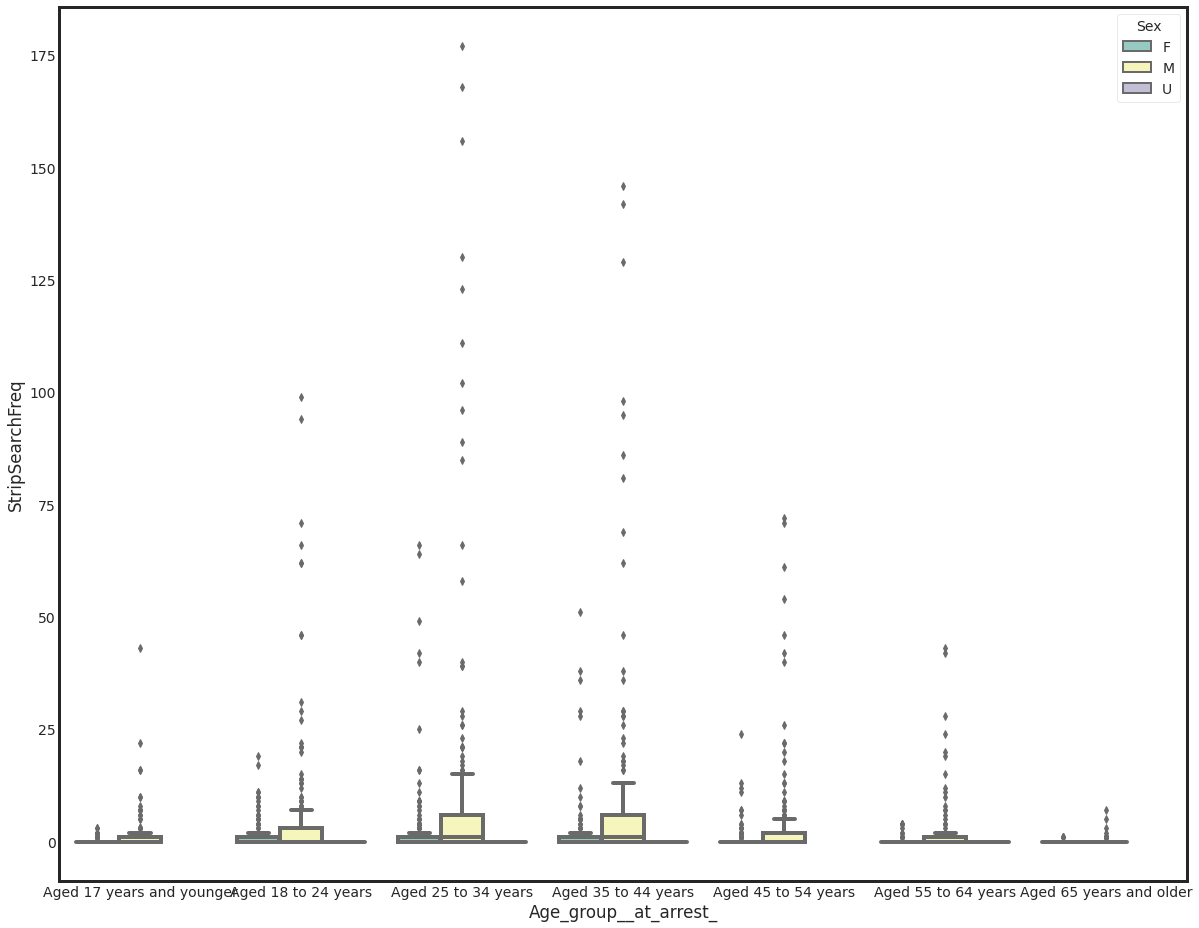

In [181]:
# generate a boxplot to see the data distribution. Using boxplot, we can easily detect the 
# differences between different groups
plt.figure(figsize= (18,15))
sns.boxplot(x="Age_group__at_arrest_", y="StripSearchFreq", hue="Sex", data=strip_search_freq, palette="Set3") 
plt.show()

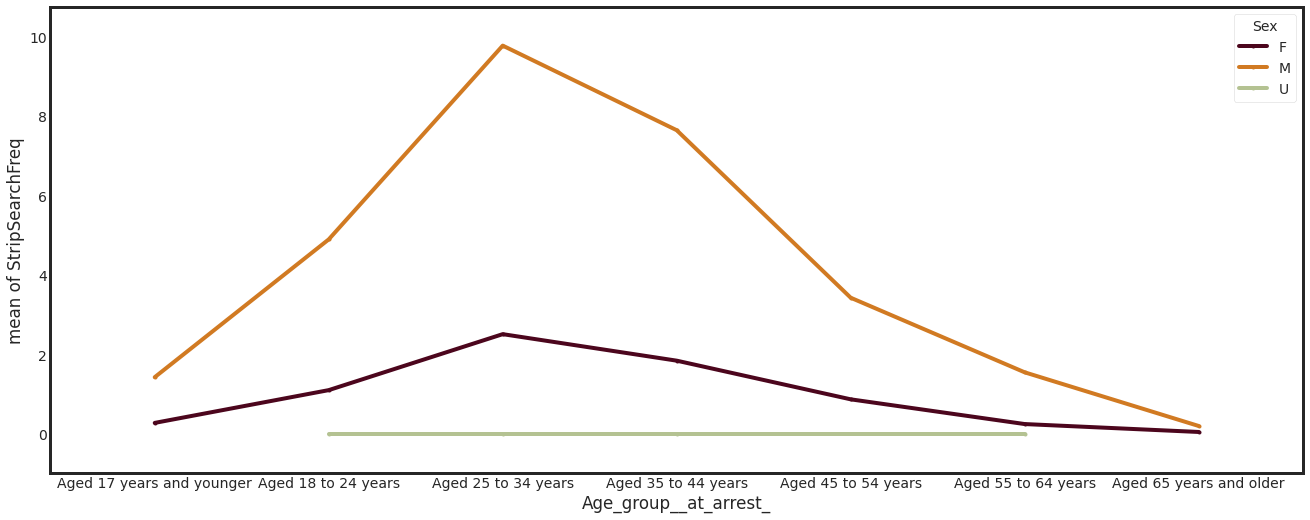

In [182]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=strip_search_freq['Age_group__at_arrest_'], trace=strip_search_freq['Sex'], response=strip_search_freq['StripSearchFreq'], 
    colors=['#4c061d','#d17a22','#b4c292'])
fig.set_figheight(8)
fig.set_figwidth(20)
plt.show()

Ho: There is no difference between the means of any two groups.
Ha: At least one pair of group means is significantly different.

In [183]:
# TUKEY HSD manybe not appropriate for two-way anova test.


# Perform the Tukey HSD test for multiple comparisons
strip_search_freq['Sex_Age'] = strip_search_freq['Sex'] + '_' + strip_search_freq['Age_group__at_arrest_']
tukey_results = sm.stats.multicomp.MultiComparison(strip_search_freq['StripSearchFreq'], strip_search_freq['Sex_Age'])
tukey_res = tukey_results.tukeyhsd()

# Display the results
print(tukey_res.summary())

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
           group1                      group2           meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------------------
F_Aged 17 years and younger       F_Aged 18 to 24 years   0.8243    0.9  -4.2958  5.9443  False
F_Aged 17 years and younger       F_Aged 25 to 34 years    2.232    0.9  -2.8259    7.29  False
F_Aged 17 years and younger       F_Aged 35 to 44 years   1.5651    0.9  -3.5892  6.7194  False
F_Aged 17 years and younger       F_Aged 45 to 54 years   0.5926    0.9  -4.7608  5.9461  False
F_Aged 17 years and younger       F_Aged 55 to 64 years  -0.0292    0.9  -5.6887  5.6302  False
F_Aged 17 years and younger   F_Aged 65 years and older  -0.2282    0.9  -6.9086  6.4522  False
F_Aged 17 years and younger M_Aged 17 years and younger   1.1496    0.9   -4.075  6.3741  False
F_Aged 17 years and younger       M_Aged